In [377]:
import json
import pandas
import requests
import matplotlib.pyplot as plt
from pprint import pprint
import seaborn as sns
consumerkey = 'dEQv6fpw94TE1bLrk5RGk8tmqSuqewD8'
consumersecret = 'etlbiAvKzoszuYpK'
%matplotlib inline

In [378]:
event_zips = []
event_names = []
event_types = []
event_genres = []
event_venues = []
event_dates = []
event_cities = []
event_states = []
event_lat = []
event_lng = []
City = 'Kansas city'
State = 'MO'
for x in range(3):
    params ={'city': City, 'stateCode': State, 'size': 200, 'page': x}
#url = 'https://app.ticketmaster.com/discovery/v2/events.json?size=1&apikey=dEQv6fpw94TE1bLrk5RGk8tmqSuqewD8'
    url = 'https://app.ticketmaster.com/discovery/v2/events.json?countryCode=US&apikey=dEQv6fpw94TE1bLrk5RGk8tmqSuqewD8'
    response = requests.get(url, params=params).json()
    for x in range(len(response['_embedded']['events'])):
        event_names.append(response['_embedded']['events'][x]['name'])
        event_types.append(response['_embedded']['events'][x]['classifications'][0]['segment']['name'])
        event_venues.append(response['_embedded']['events'][x]['_embedded']['venues'][0]['name'])
        event_dates.append(response['_embedded']['events'][x]["dates"]["start"]["localDate"])
        event_zips.append(response['_embedded']['events'][x]["_embedded"]["venues"][0]["postalCode"])
        event_cities.append(response['_embedded']['events'][x]["_embedded"]["venues"][0]["city"]["name"])
        event_states.append(response['_embedded']['events'][x]["_embedded"]["venues"][0]["state"]["name"])
        event_lat.append(response['_embedded']['events'][x]["_embedded"]["venues"][0]["location"]["longitude"])
        event_lng.append(response['_embedded']['events'][x]["_embedded"]["venues"][0]["location"]["latitude"])
        try:
            event_genres.append(response['_embedded']['events'][x]['classifications'][0]['genre']['name'])
        except:
            event_genres.append('Undefined')

In [379]:
df = pandas.DataFrame({'event name': event_names, 
                       'Classification': event_types, 
                       'genre': event_genres, 
                       'venue': event_venues, 
                       'Date':event_dates, 
                       'Zip code':event_zips,
                       'Latitude':event_lat,
                       'Longitude':event_lng,
                       'City':event_cities,
                       'State':event_states})
df.head()


,event name,Classification,genre,venue,Date,Zip code,Latitude,Longitude,City,State
0,Kansas City Chiefs vs. San Francisco 49ers,Sports,Football,Arrowhead Stadium,2018-09-23,64129,-94.48417065,39.04921048,Kansas City,Missouri
1,Kansas City Chiefs vs. Denver Broncos,Sports,Football,Arrowhead Stadium,2018-10-28,64129,-94.48417065,39.04921048,Kansas City,Missouri
2,Kansas City Chiefs vs. Green Bay Packers,Sports,Football,Arrowhead Stadium,2018-08-30,64129,-94.48417065,39.04921048,Kansas City,Missouri
3,Aubrey & The Three Migos Tour,Music,R&B,Sprint Center,2018-08-10,64106,-94.571297,39.106701,Kansas City,Missouri
4,Panic! at the Disco w/ Two Feet,Music,Alternative,Sprint Center,2019-02-02,64106,-94.571297,39.106701,Kansas City,Missouri


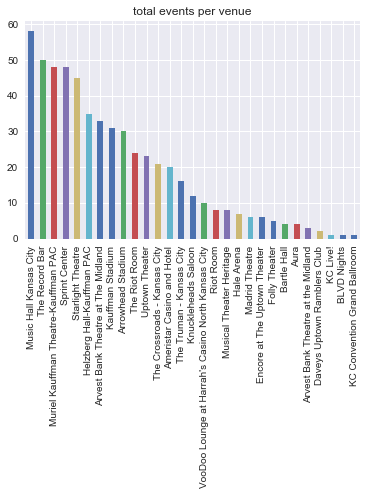

In [380]:
df['venue'].value_counts().plot(kind='bar', title='total events per venue')

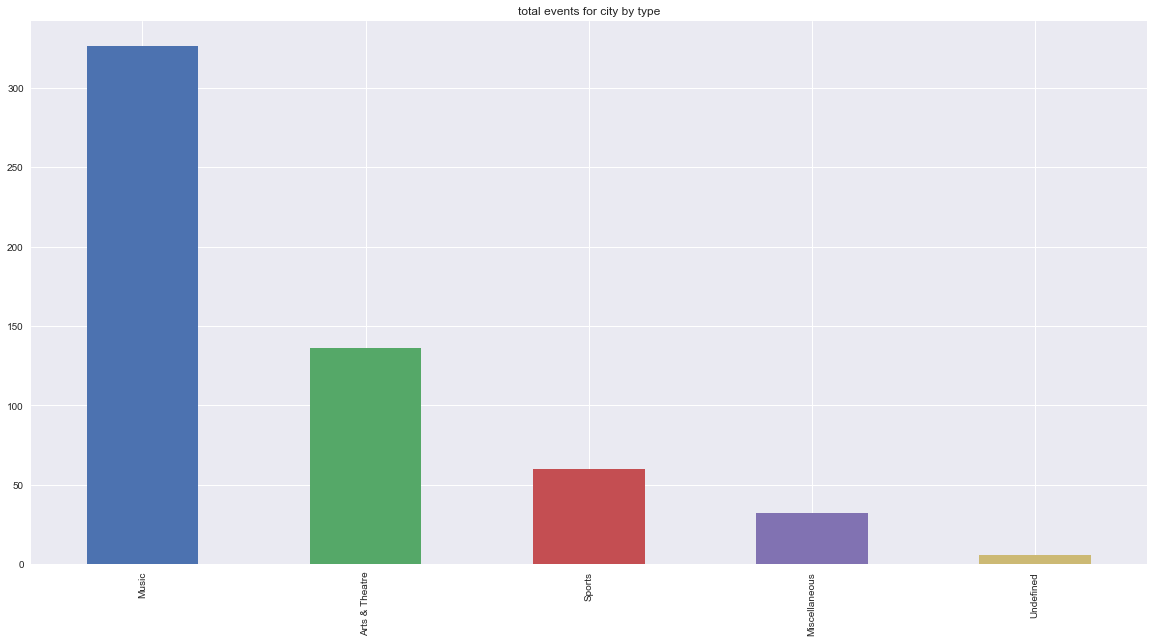

In [381]:
df['Classification'].value_counts().plot(kind='bar', title = 'total events for city by type', figsize= (20,10))


In [382]:
stacked = df.groupby(['venue','Classification']).count()



In [383]:
venueDB  = {}
for index, row in stacked.iterrows():
    name = index[0]
    category = index[1]
    count = row['genre']
    if(venueDB.get(name, "null") == "null"):
        venueDB[name] = { category: count}
    else:
         venueDB[name][category] = count
   
print(venueDB)

{'Ameristar Casino and Hotel': {'Arts & Theatre': 4, 'Music': 13, 'Sports': 3}, 'Arrowhead Stadium': {'Miscellaneous': 10, 'Music': 2, 'Sports': 18}, 'Arvest Bank Theatre at The Midland': {'Arts & Theatre': 7, 'Music': 24, 'Undefined': 2}, 'Arvest Bank Theatre at the Midland': {'Arts & Theatre': 1, 'Music': 2}, 'Aura': {'Music': 4}, 'BLVD Nights': {'Music': 1}, 'Bartle Hall': {'Miscellaneous': 4}, 'Daveys Uptown Ramblers Club': {'Music': 2}, 'Encore at The Uptown Theater': {'Music': 6}, 'Folly Theater': {'Arts & Theatre': 1, 'Music': 4}, 'Hale Arena': {'Sports': 7}, 'Helzberg Hall-Kauffman PAC': {'Miscellaneous': 4, 'Music': 31}, 'KC Convention Grand Ballroom': {'Arts & Theatre': 1}, 'KC Live!': {'Undefined': 1}, 'Kauffman Stadium': {'Music': 3, 'Sports': 28}, 'Knuckleheads Saloon': {'Music': 12}, 'Madrid Theatre': {'Music': 6}, 'Muriel Kauffman Theatre-Kauffman PAC': {'Arts & Theatre': 31, 'Miscellaneous': 12, 'Music': 5}, 'Music Hall Kansas City': {'Arts & Theatre': 57, 'Miscellaneou

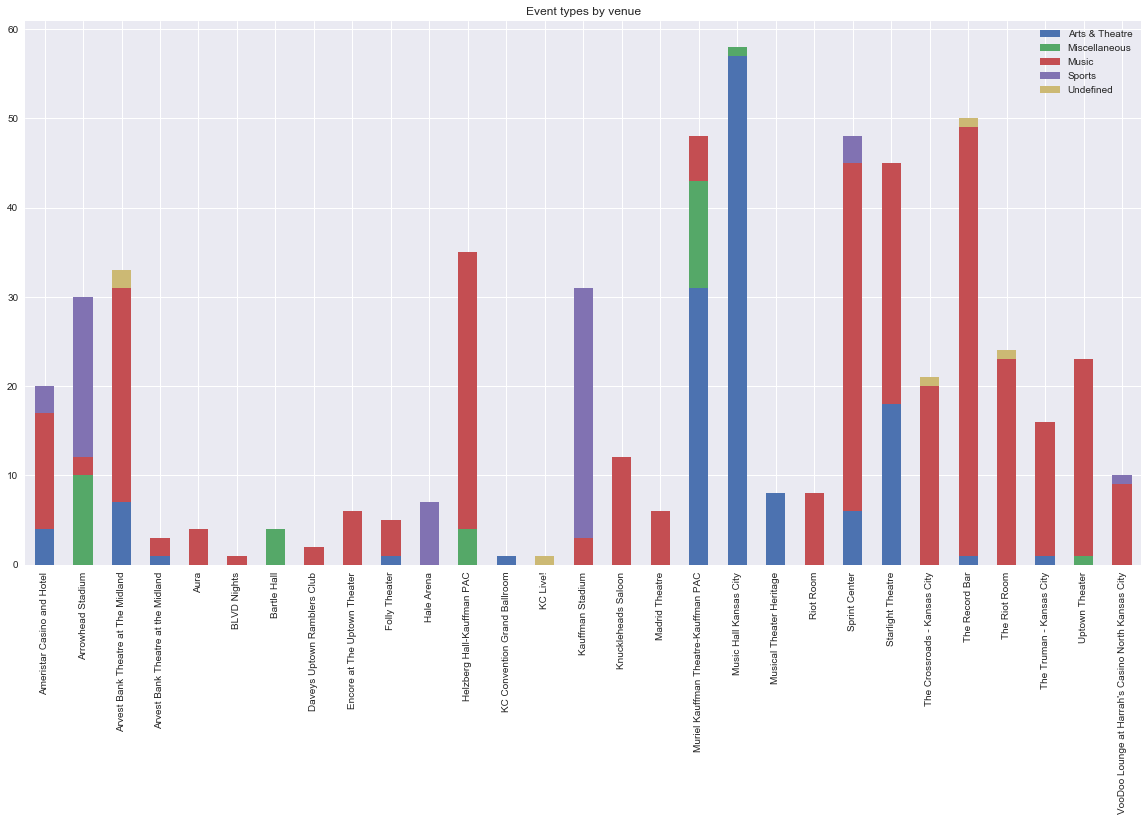

In [384]:
db = pandas.DataFrame(venueDB)
stackedbar_df = db.transpose()
stackedbar_df = stackedbar_df.fillna(value= 0)
stackedevents = stackedbar_df.plot(kind='bar', stacked=True, figsize=(20,10), title='Event types by venue')


In [385]:
stackedgenre = df.groupby(['Classification','genre']).count()
stackedgenre.head()

event name  venue  Date  Zip code  Latitude  \
Classification genre                                                           
Arts & Theatre Comedy                     5      5     5         5         5   
               Dance                      1      1     1         1         1   
               Fashion                    1      1     1         1         1   
               Magic & Illusion           1      1     1         1         1   
               Miscellaneous             27     27    27        27        27   

                                 Longitude  City  State  
Classification genre                                     
Arts & Theatre Comedy                    5     5      5  
               Dance                     1     1      1  
               Fashion                   1     1      1  
               Magic & Illusion          1     1      1  
               Miscellaneous            27    27     27

In [386]:
genreDB = {}
for index, row in stackedgenre.iterrows():
    Class = index[0]
    genre = index[1]
    count = row['event name']
    if (genreDB.get(Class, 'null') == 'null'):
        genreDB[Class] = {genre : count}
    else:
        genreDB[Class][genre] = count
print(genreDB)

{'Arts & Theatre': {'Comedy': 5, 'Dance': 1, 'Fashion': 1, 'Magic & Illusion': 1, 'Miscellaneous': 27, 'Miscellaneous Theatre': 2, 'Performance Art': 7, 'Undefined': 92}, 'Miscellaneous': {'Community/Civic': 1, 'Fairs & Festivals': 4, 'Hobby/Special Interest Expos': 4, 'Holiday': 12, 'Undefined': 11}, 'Music': {'Alternative': 33, 'Blues': 8, "Children's Music": 1, 'Classical': 20, 'Country': 22, 'Dance/Electronic': 13, 'Folk': 2, 'Hip-Hop/Rap': 13, 'Metal': 4, 'Other': 78, 'Pop': 14, 'R&B': 7, 'Reggae': 2, 'Rock': 97, 'Undefined': 4, 'World': 8}, 'Sports': {'Baseball': 28, 'Basketball': 3, 'Equestrian': 1, 'Football': 10, 'Martial Arts': 4, 'Miscellaneous': 8, 'Rodeo': 6}, 'Undefined': {'Undefined': 6}}


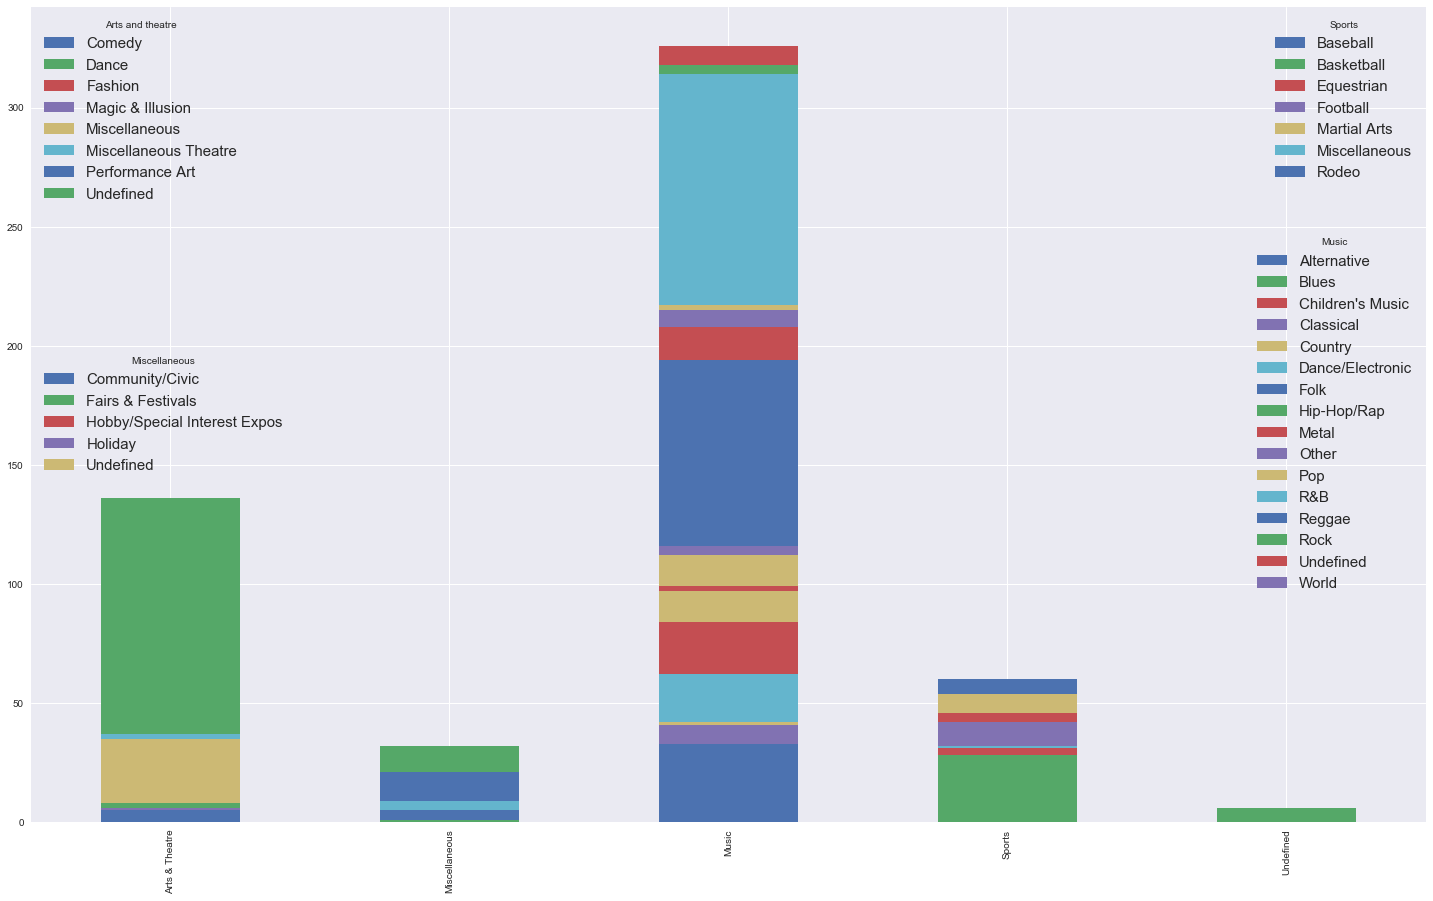

In [387]:
genreDF = pandas.DataFrame(genreDB)
genreDF = genreDF.transpose()
genreDF = genreDF.fillna(value=0)
gplot = genreDF.plot(kind='bar', stacked=True, figsize=(25,15))

musiclegend = []
sportslegend = []
artslegend = []
misclegend = []
for key, value in genreDB['Music'].items():
    musiclegend.append(key)
for key, value in genreDB['Sports'].items():
    sportslegend.append(key)
for key, value in genreDB['Arts & Theatre'].items():
    artslegend.append(key)
for key, value in genreDB['Miscellaneous'].items():
    misclegend.append(key)
    
l1 = gplot.legend(musiclegend, title='Music',  loc= 5, prop={'size': 15})
l2 = gplot.legend(sportslegend, title='Sports', loc=1, prop={'size': 15})
l3 = gplot.legend(artslegend, title= 'Arts and theatre', loc=2, prop={'size': 15})
l4 = gplot.legend(misclegend, title='Miscellaneous',  loc= 6, prop={'size': 15})
gplot.add_artist(l1)   
gplot.add_artist(l2)   
gplot.add_artist(l3)

In [388]:
#above graph has yet to match colors to values, still working on colormap and legends
#example of bar values VVV
genreDB['Miscellaneous']

{'Community/Civic': 1,
 'Fairs & Festivals': 4,
 'Hobby/Special Interest Expos': 4,
 'Holiday': 12,
 'Undefined': 11}